<a href="https://colab.research.google.com/github/bnguyen0847/MIS515_Project2/blob/main/Project2LinearRegressionModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Cleaning**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler   #scaling the input features might help the optimization process

df = pd.read_csv('/content/RE_CA.csv')


dfclean = df[(df.homeType == 'SINGLE_FAMILY')].dropna()
dfclean = dfclean[(df.county == 'San Diego County')].dropna().drop('event', axis=1)

#Levels
dfclean = dfclean.replace("Two", int(2))
dfclean = dfclean.replace("One", int(1))
dfclean = dfclean.replace("0", int(0))
dfclean = dfclean.replace("Three", int(3))
dfclean = dfclean.replace("Three Or More", int(3))
dfclean = dfclean.replace('Multi/Split', int(2))
dfclean = dfclean.replace("Two Story", int(2))
dfclean = dfclean.replace('One-Multi/Split', int(1))
dfclean = dfclean.replace('Two-Multi/Split', int(2))
dfclean = dfclean.replace('One-Two', int(1))
dfclean = dfclean.replace('Two-Three Or More', int(2))
dfclean = dfclean.replace('One Story', int(1))


dfclean['yearsOld'] = 2024 - dfclean['yearBuilt']
dfclean


<ipython-input-2-9b97c0c05870>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfclean = dfclean[(df.county == 'San Diego County')].dropna().drop('event', axis=1)


,Unnamed: 0,price,pricePerSquareFoot,city,yearBuilt,livingArea,lotAreaUnits,bathrooms,bedrooms,parking,garageSpaces,levels,pool,isNewConstruction,homeType,county,yearsOld
144,144,1750000,688,La Jolla,1990,2544,sqft,3,4,1,2,2,1,0,SINGLE_FAMILY,San Diego County,34
145,145,4195000,1597,La Jolla,1991,2627,sqft,2,3,1,2,1,0,0,SINGLE_FAMILY,San Diego County,33
146,146,2450000,908,La Jolla,1991,2699,sqft,3,4,1,3,1,0,0,SINGLE_FAMILY,San Diego County,33
147,147,1599000,767,La Jolla,1980,2086,Acres,4,3,1,0,3,0,0,SINGLE_FAMILY,San Diego County,44
148,148,3298000,723,La Jolla,2004,4564,sqft,5,5,1,2,2,0,0,SINGLE_FAMILY,San Diego County,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34987,34987,2350000,526,San Diego,2002,4466,sqft,5,4,1,4,2,0,0,SINGLE_FAMILY,San Diego County,22
34988,34988,2599000,644,San Diego,2006,4033,Acres,5,4,1,3,0,1,0,SINGLE_FAMILY,San Diego County,18
35323,35323,395000,442,Boulevard,1939,893,Acres,2,2,1,1,0,0,0,SINGLE_FAMILY,San Diego County,85
35326,35326,289000,332,Boulevard,1923,870,Acres,1,2,1,0,0,0,0,SINGLE_FAMILY,San Diego County,101


**Data Exploration**

In [ ]:
dfclean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1775 entries, 144 to 35335
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          1775 non-null   int64 
 1   price               1775 non-null   int64 
 2   pricePerSquareFoot  1775 non-null   int64 
 3   city                1775 non-null   object
 4   yearBuilt           1775 non-null   int64 
 5   livingArea          1775 non-null   int64 
 6   lotAreaUnits        1775 non-null   object
 7   bathrooms           1775 non-null   int64 
 8   bedrooms            1775 non-null   int64 
 9   parking             1775 non-null   int64 
 10  garageSpaces        1775 non-null   int64 
 11  levels              1775 non-null   int64 
 12  pool                1775 non-null   int64 
 13  isNewConstruction   1775 non-null   int64 
 14  homeType            1775 non-null   object
 15  county              1775 non-null   object
 16  yearsOld            1775 n

In [ ]:
dfclean.describe()

,Unnamed: 0,price,pricePerSquareFoot,yearBuilt,livingArea,bathrooms,bedrooms,parking,garageSpaces,levels,pool,isNewConstruction,yearsOld
count,1775.000000,1.775000e+03,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000
mean,18733.407887,1.382382e+06,569.669296,1976.574085,2327.489014,2.926197,3.665915,0.968451,1.965634,1.390423,0.177465,0.011268,47.425915
std,10204.329804,2.067373e+06,403.643436,52.559882,1674.303928,1.444839,1.131413,0.174846,1.101118,0.748707,0.382169,0.105579,52.559882
min,144.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,9668.500000,6.790000e+05,379.000000,1960.000000,1424.000000,2.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,27.000000
50%,19465.000000,8.533000e+05,484.000000,1978.000000,1929.000000,3.000000,4.000000,1.000000,2.000000,1.000000,0.000000,0.000000,46.000000
75%,27945.500000,1.324950e+06,635.000000,1997.000000,2674.000000,3.000000,4.000000,1.000000,2.000000,2.000000,0.000000,0.000000,64.000000
max,35335.000000,3.500000e+07,6689.000000,2022.000000,31068.000000,15.000000,15.000000,1.000000,12.000000,3.000000,1.000000,1.000000,2024.000000


<ipython-input-82-13623061a1c2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfclean['price'])


<Axes: xlabel='price', ylabel='Density'>

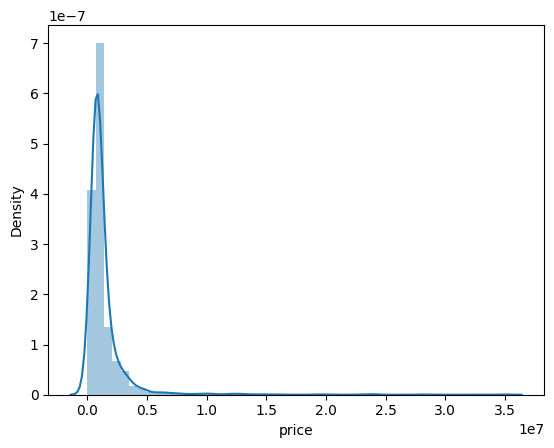

In [ ]:
sns.distplot(dfclean['price'])

<Axes: >

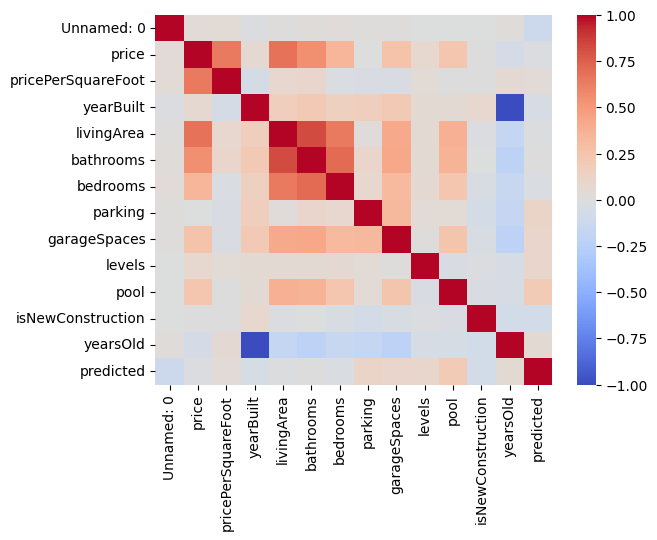

In [ ]:
sns.heatmap(dfclean.drop(['city','lotAreaUnits','homeType','county'], axis=1).corr(), cmap="coolwarm")
#pricePerSquareFoot 0.64
#livingArea 0.68
#bathrroms 0.55
#bedrooms 0.35

In [ ]:
dfclean.drop(['city','lotAreaUnits','homeType','county'], axis=1).corr()

,Unnamed: 0,price,pricePerSquareFoot,yearBuilt,livingArea,bathrooms,bedrooms,parking,garageSpaces,levels,pool,isNewConstruction,yearsOld,predicted
Unnamed: 0,1.000000,0.033099,0.043021,-0.020374,0.009457,0.020956,0.023634,0.013462,0.014335,-0.004818,-0.005891,-0.000045,0.020374,-0.123840
price,0.033099,1.000000,0.642168,0.067409,0.675340,0.548935,0.350889,-0.005082,0.261794,0.075955,0.238496,0.005460,-0.067409,-0.019933
pricePerSquareFoot,0.043021,0.642168,1.000000,-0.060193,0.082589,0.099890,-0.025190,-0.034061,-0.033895,0.046812,0.005953,0.004624,0.060193,0.037985
yearBuilt,-0.020374,0.067409,-0.060193,1.000000,0.166503,0.214679,0.153444,0.165133,0.215098,0.048333,0.048189,0.080708,-1.000000,-0.050078
livingArea,0.009457,0.675340,0.082589,0.166503,1.000000,0.826377,0.644823,0.026206,0.419021,0.053952,0.378230,-0.018798,-0.166503,-0.015349
bathrooms,0.020956,0.548935,0.099890,0.214679,0.826377,1.000000,0.706984,0.100115,0.426067,0.050101,0.359600,-0.005631,-0.214679,0.002338
bedrooms,0.023634,0.350889,-0.025190,0.153444,0.644823,0.706984,1.000000,0.083466,0.316559,0.060237,0.237577,-0.043973,-0.153444,-0.025121
parking,0.013462,-0.005082,-0.034061,0.165133,0.026206,0.100115,0.083466,1.000000,0.322290,0.042473,0.041657,-0.072340,-0.165133,0.116736
garageSpaces,0.014335,0.261794,-0.033895,0.215098,0.419021,0.426067,0.316559,0.322290,1.000000,0.014233,0.244903,-0.040307,-0.215098,0.096155
levels,-0.004818,0.075955,0.046812,0.048333,0.053952,0.050101,0.060237,0.042473,0.014233,1.000000,-0.035428,-0.020027,-0.048333,0.089610


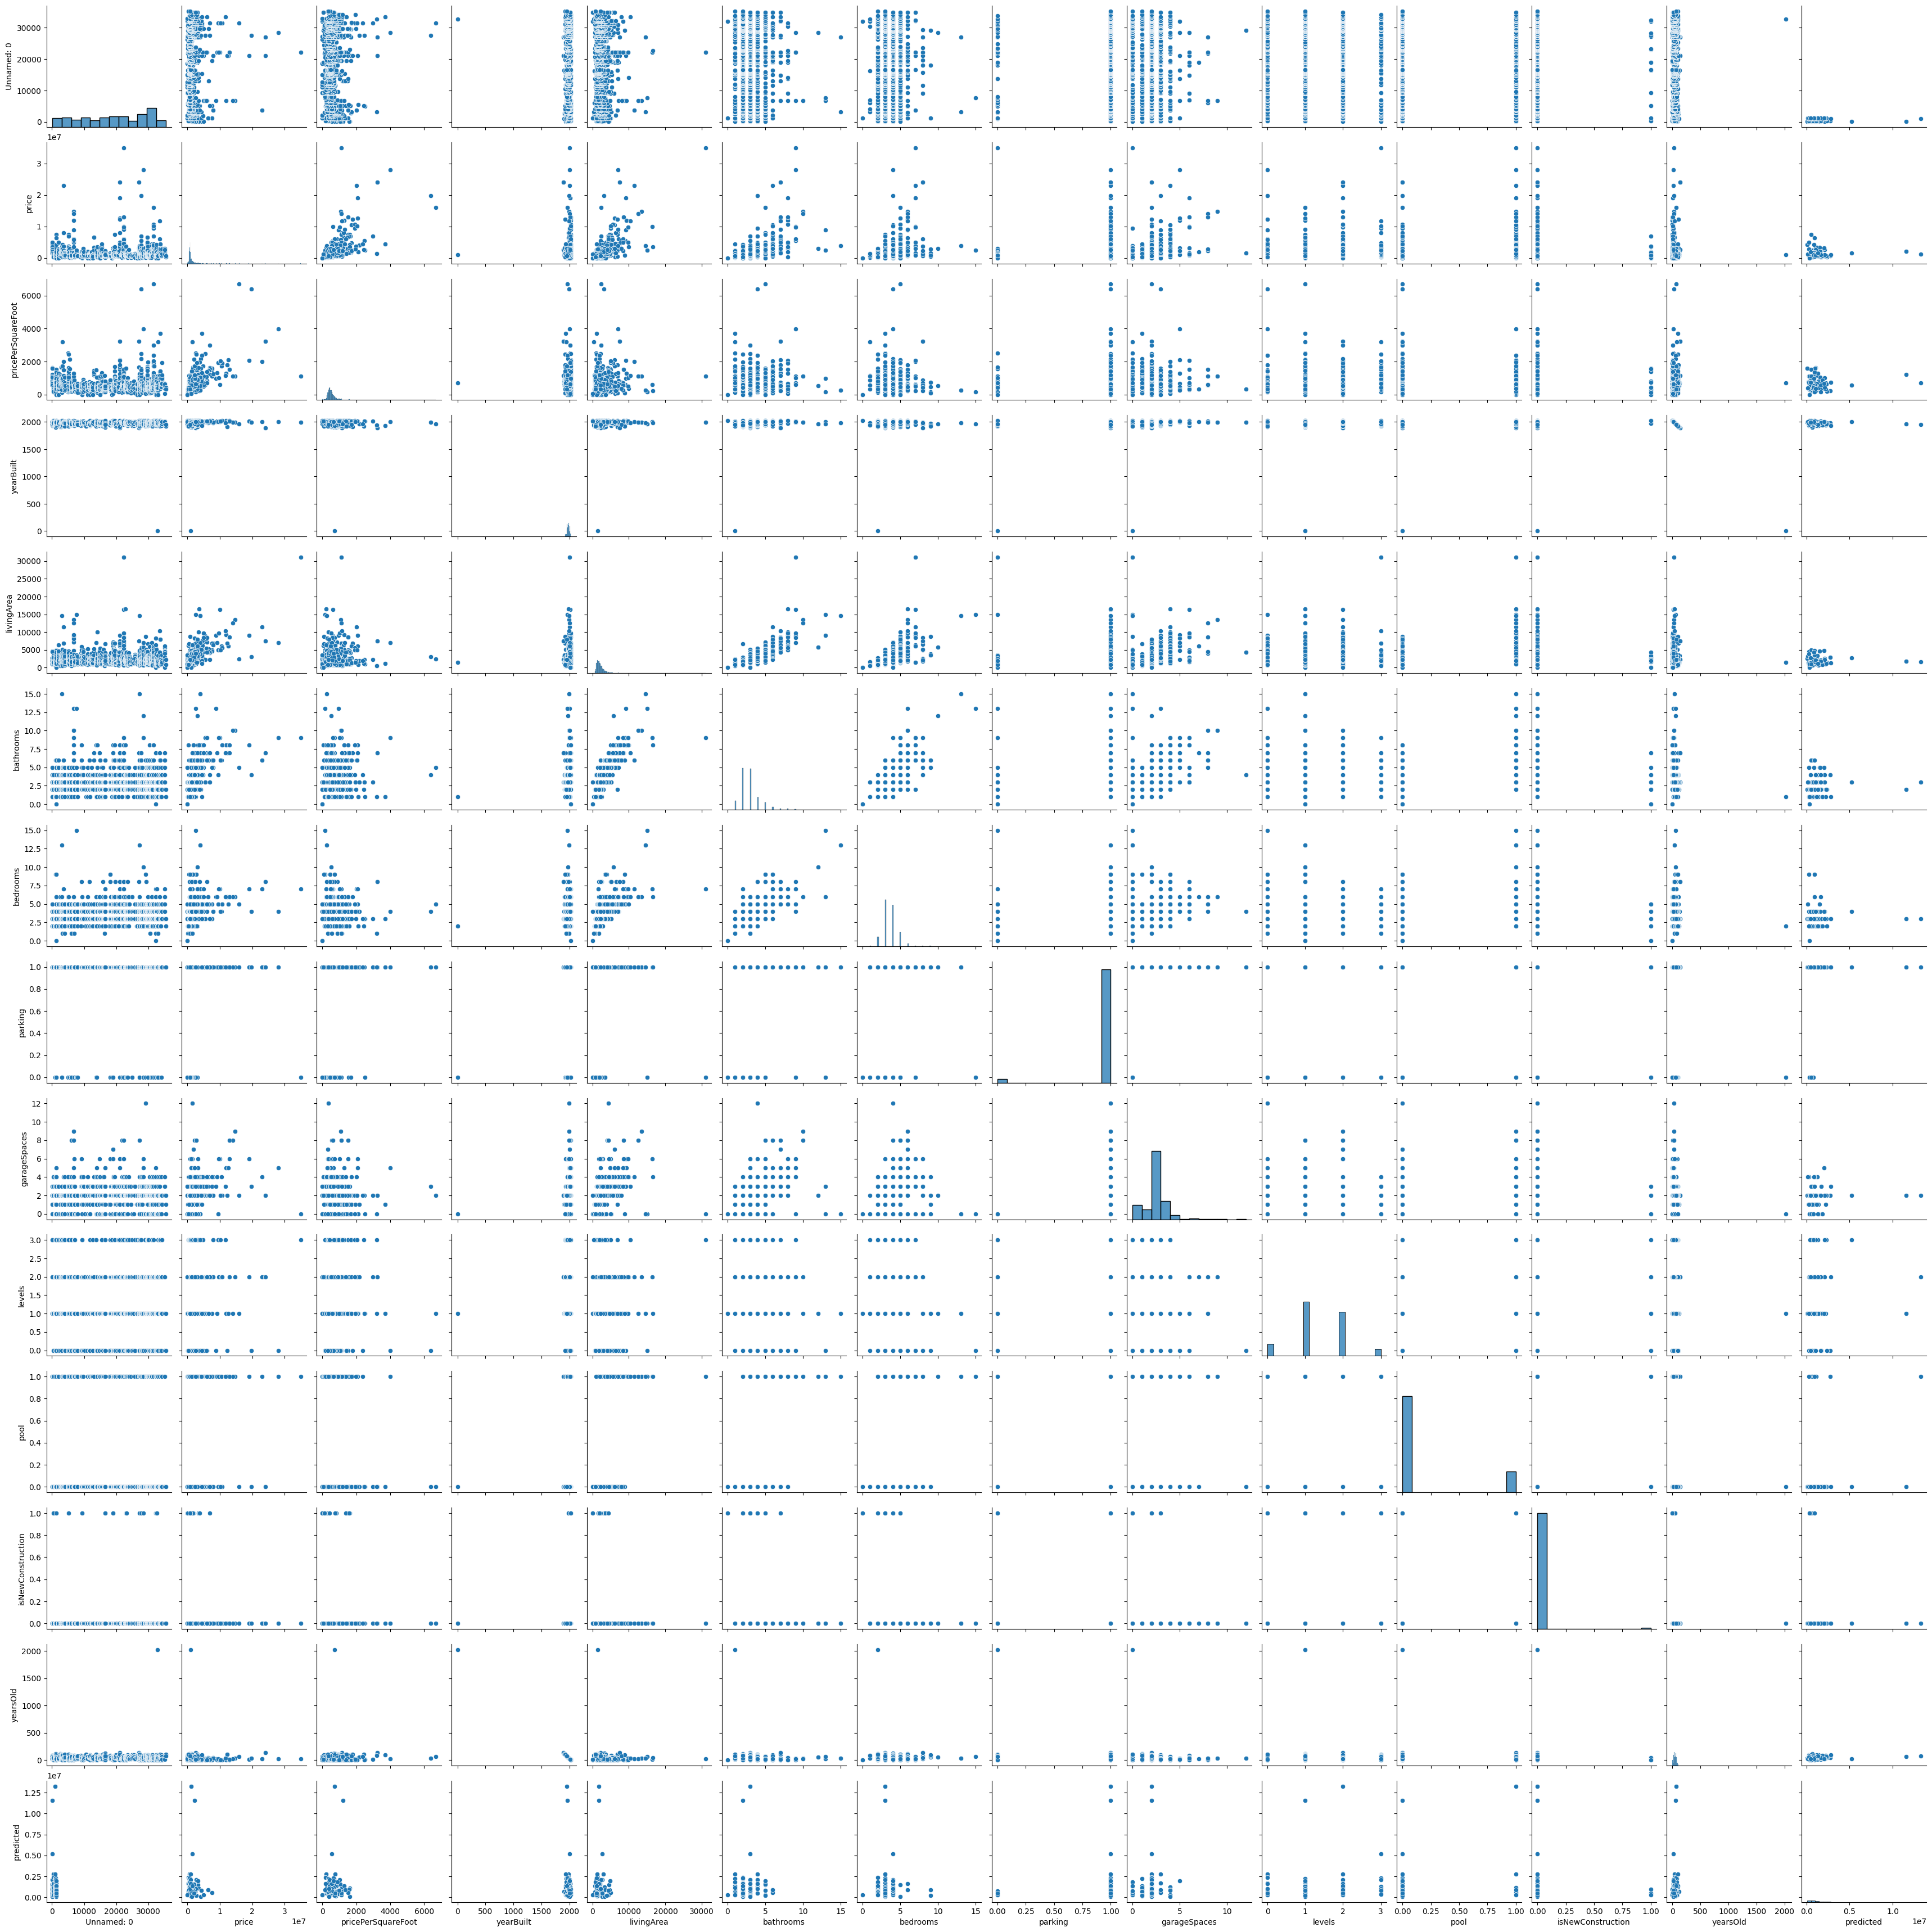

In [ ]:
sns.pairplot(dfclean)

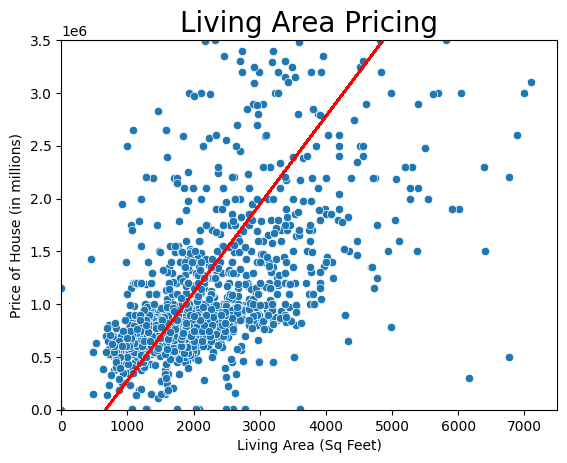

0.45608455599859477


In [ ]:
#livingArea Correlation
x = dfclean[['livingArea']]
y = dfclean[['price']]

model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

plt.title('Living Area Pricing', fontsize=20)
SDLivArea =sns.scatterplot(
    x = 'livingArea',
    y = 'price',
    data = dfclean
)

SDLivArea.set(
    xlabel = 'Living Area (Sq Feet)',
    ylabel = 'Price of House (in millions)')

plt.plot(x,y_pred, color='red')
plt.xlim([0,7500])
plt.ylim([0,3500000])
plt.show()
r2_score = model.score(x,y)
print(r2_score)

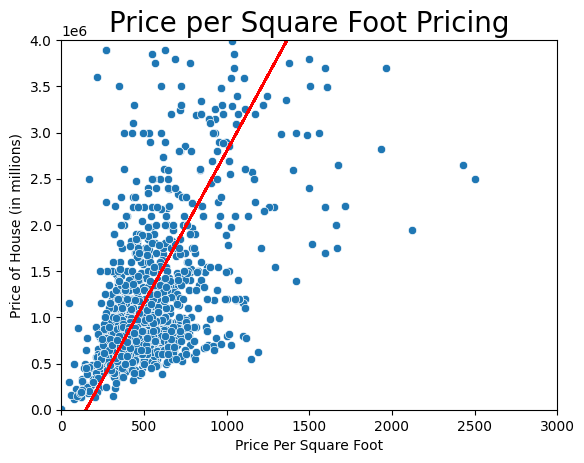

0.4123791460089056


In [ ]:
#pricepersqft correlation
x = dfclean[['pricePerSquareFoot']]
y = dfclean[['price']]

model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

plt.title('Price per Square Foot Pricing', fontsize=20)
sdPPSQFT =sns.scatterplot(
    x = 'pricePerSquareFoot',
    y = 'price',
    data = dfclean
)
sdPPSQFT.set(
    xlabel = 'Price Per Square Foot',
    ylabel = 'Price of House (in millions)')

plt.plot(x,y_pred, color='red')
plt.xlim([0,3000])
plt.ylim([0,4000000])
plt.show()
r2_score = model.score(x,y)
print(r2_score)

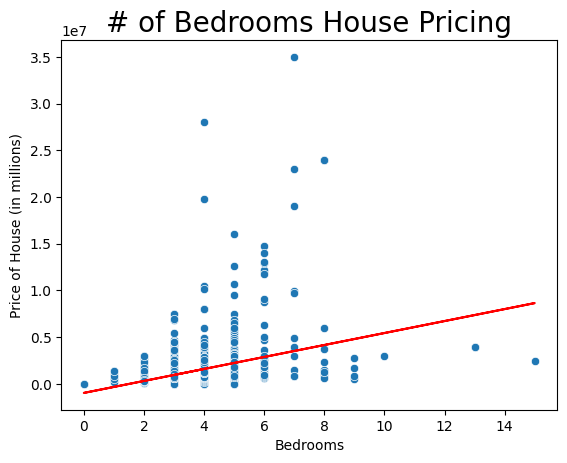

0.12312325418198555


In [ ]:
#Bedrooms Correlation
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

x = dfclean[['bedrooms']]
y = dfclean[['price']]

model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

plt.title('# of Bedrooms House Pricing', fontsize=20)
sdbeds =sns.scatterplot(
    x = 'bedrooms',
    y = 'price',
    data = dfclean
)
sdbeds.set(
    xlabel = 'Bedrooms',
    ylabel = 'Price of House (in millions)')

plt.plot(x,y_pred, color='red')
plt.show()

r2_score = model.score(x,y)


print(r2_score)

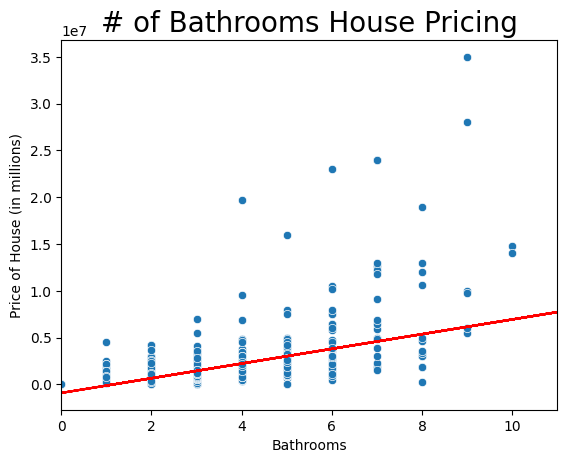

0.30132942445342925


In [ ]:
#bathroom correlation
x = dfclean[['bathrooms']]
y = dfclean[['price']]

model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

plt.title('# of Bathrooms House Pricing', fontsize=20)
sdbeds =sns.scatterplot(
    x = 'bathrooms',
    y = 'price',
    data = dfclean
)
sdbeds.set(
    xlabel = 'Bathrooms',
    ylabel = 'Price of House (in millions)')


plt.plot(x,y_pred, color='red')
plt.xlim([0,11])
#plt.ylim([0,3500000])
plt.show()

r2_score = model.score(x,y)


print(r2_score)

**Regressions**

In [ ]:
#training the dataset
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = dfclean[['livingArea','bedrooms','bathrooms','pricePerSquareFoot']]
Y = dfclean['price']

# Split the training set into
# training and validation set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=515)

In [ ]:
#linear Regression

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_test)

print('MAE %',mean_absolute_percentage_error(Y_test, Y_pred))

print('MAE:', mean_absolute_error(Y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

MAE % 1.787118248366508
MAE: 397621.70094647305
MSE: 848169133058.4917
RMSE: 920960.9834615643


https://stackoverflow.com/questions/52359471/how-to-predict-a-value-using-pandas-data-frame


In [ ]:
#OLS Regression
import statsmodels.api as sm
import statsmodels.graphics.gofplots as smg

x = sm.add_constant(X)
model = sm.OLS(Y,x).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     1836.
Date:                Wed, 10 Apr 2024   Prob (F-statistic):               0.00
Time:                        00:23:38   Log-Likelihood:                -26875.
No. Observations:                1775   AIC:                         5.376e+04
Df Residuals:                    1770   BIC:                         5.379e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.795e+06   8.39

In [ ]:
#detailed p-value per factor
for x in range (0,4):
  print(model.pvalues[x])

1.5098930454958816e-90
4.03636041611798e-228
0.001758330295630291
0.002653680472103676


Text(0, 0.5, 'Residuals')

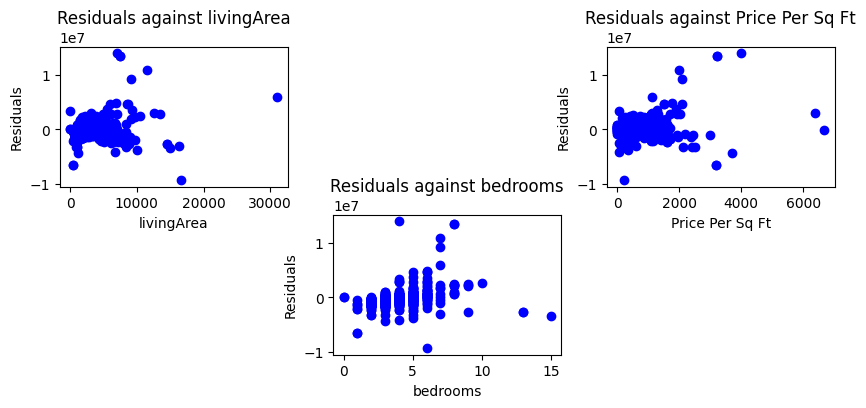

In [ ]:
#residuals from OLS
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(2, 3, 1)
plt.plot(dfclean['livingArea'], model.resid, 'o', color='blue')
plt.title('Residuals against livingArea')
plt.xlabel('livingArea')
plt.ylabel('Residuals')

ax = fig.add_subplot(2, 3, 3)
plt.plot(dfclean['pricePerSquareFoot'], model.resid, 'o', color='blue')
plt.title('Residuals against Price Per Sq Ft')
plt.xlabel('Price Per Sq Ft')
plt.ylabel('Residuals')

ax = fig.add_subplot(2, 3, 5)
plt.plot(dfclean['bedrooms'], model.resid, 'o', color='blue')
plt.title('Residuals against bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('Residuals')

Text(0, 0.5, 'Residuals')

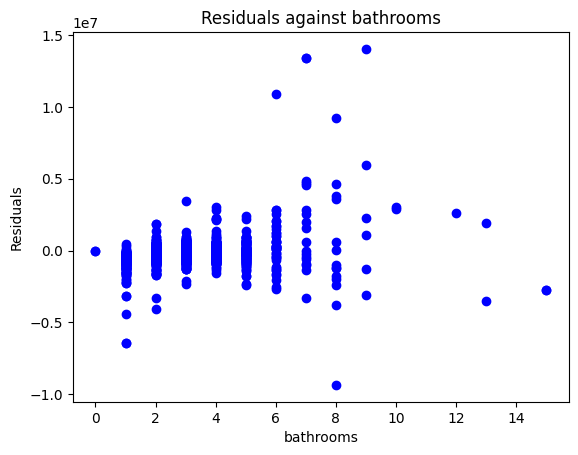

In [ ]:
#residuals from OLS

ax = fig.add_subplot(2, 3, 3)
plt.plot(dfclean['bathrooms'], model.resid, 'o', color='blue')
plt.title('Residuals against bathrooms')
plt.xlabel('bathrooms')
plt.ylabel('Residuals')

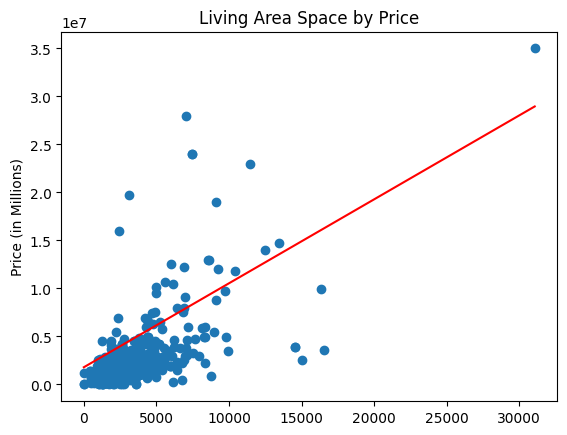

In [ ]:
# plotting the original values
x = dfclean['livingArea'].tolist()
y = dfclean['price'].tolist()
plt.scatter(x, y)

# finding the maximum and minimum
# values of x, to get the
# range of data
max_x = dfclean['livingArea'].max()
min_x = dfclean['livingArea'].min()

# range of values for plotting
# the regression line
x = np.arange(min_x, max_x, 1)

# the substituted equation
y = 874.4189 * x - -1.795e+06

# plotting the regression line
plt.plot(y, 'r')
plt.title('Living Area Space by Price')
plt.ylabel('Price (in Millions)')
plt.show()

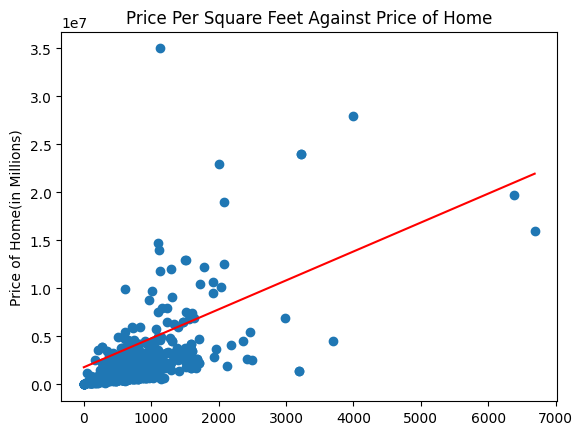

In [ ]:
# plotting the original values
x = dfclean['pricePerSquareFoot'].tolist()
y = dfclean['price'].tolist()
plt.scatter(x, y)

# finding the maximum and minimum
# values of x, to get the
# range of data
max_x = dfclean['pricePerSquareFoot'].max()
min_x = dfclean['pricePerSquareFoot'].min()

# range of values for plotting
# the regression line
x = np.arange(min_x, max_x, 1)

# the substituted equation
y = 3014.8669 * x - -1.795e+06

# plotting the regression line
plt.plot(y, 'r')
plt.title('Price Per Square Feet Against Price of Home')
plt.ylabel('Price of Home(in Millions)')
plt.show()